As the data to build the model is from 3rd party resource, exploration and cleaning is essential step. 
Meanwhile, the primary data is question sentance which a typical NLP data cleaning step should be followed to guarantee the data is generic.

In [1]:
import numpy as np
import pandas as pd

In [2]:
train_data = pd.read_csv('data/train.csv')
test_data = pd.read_csv('data/test.csv')

### Preliminary EDA

In [3]:
print('Training data set: ' + str(len(train_data)))
print('Test data set: ' + str(len(test_data)))


Training data set: 1306122
Test data set: 375806


The below indicate there is no null cell in all columns. Hence, don't need to fill or remove the record at this moment 

In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1306122 entries, 0 to 1306121
Data columns (total 3 columns):
qid              1306122 non-null object
question_text    1306122 non-null object
target           1306122 non-null int64
dtypes: int64(1), object(2)
memory usage: 29.9+ MB


In [5]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375806 entries, 0 to 375805
Data columns (total 2 columns):
qid              375806 non-null object
question_text    375806 non-null object
dtypes: object(2)
memory usage: 5.7+ MB


In [6]:
print (train_data.question_text.describe())
print('\n')
print (test_data.question_text.describe())

count                                               1306122
unique                                              1306122
top       Do you think Haruki Murakami takes too much fr...
freq                                                      1
Name: question_text, dtype: object


count                                                375806
unique                                               375806
top       Is there a real threat of a massive earthquake...
freq                                                      1
Name: question_text, dtype: object


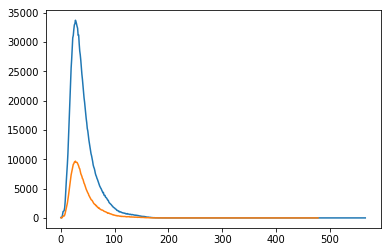

In [24]:
train_data['length'] = train_data['question_text'].str.len()
test_data['length'] = test_data['question_text'].str.len()

train_data['length'].value_counts().sort_index().plot(kind='line')
test_data['length'].value_counts().sort_index().plot(kind='line')

Below shows the ratio on target value: majority of questions are normal/valid question

0    1225312
1      80810
Name: target, dtype: int64


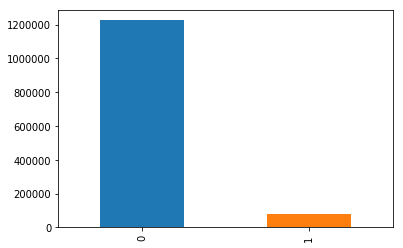

In [8]:
print(train_data['target'].value_counts())
train_data['target'].value_counts().plot(kind='bar')

Below shows the question text contains white space, special symbol & foreign characters. 
As the nlp has language specific settings and functions, the foreign characters & extra white space should be removed 
As for punchaction, some AI/ML models take the punchaction into account for semantic parsing. Some models, such as bag of words, does not using punchaction due to the natural of the algorithm is based on word frequency.    

In [9]:
sorted = train_data.sort_values('question_text')

In [10]:
sorted['question_text'].head(10)

840731          I want to blow things up with TNT now what?
613283     !TRIGGER WARNING! Am I a homophobe if I refuse...
420816                                                     "
1102919    " I post a download link of a website in my we...
213438     " I visited the theater" or "I enjoyed the the...
496717     " I've been to the doctor many times now to cu...
646127     " Is there anybody who had drastic good / bad ...
4692       " So far She has published three chapters of h...
998382     " What does the scientific mean when you dream...
387244     " if 25 men working 6 hrs a day, can do a work...
Name: question_text, dtype: object

In [11]:
sorted['question_text'].tail(10)

113435     ⁠⁠Is it bad to lay your motorcycle on its side...
146277                       −6.175 is an irrational number?
859955     ♣ Why does Winston finally give in to the ideo...
1185049    ⦁ What are the methods used to suppress or red...
415446     译文 who well be enter the next member of the st...
231111                                   한국 고등학교는 몇시간 수업하니까?
814877               what is the Complex compound sentence?
916459     ﻿What are the best porn pictures serving websi...
1261734    Ｈow do I find the negative solution of 4^x = x...
344918     ￼￼Assuming that a lightning bolt can be modell...
Name: question_text, dtype: object

### Preliminary EDA
A typical NLP pre-processed step contains the following: 
- Removing accented & foreign characters
    - The NLP is limited to one language in most of modeler, Therefore, it is helpful to remove characters tat is not english 
- Expanding Contractions
    - Frequently, contractions shows up in text taht generate variation for words. It will be helpful if we can remove them. The contractions can be removed via syntax rule.
- Expanding Abbreviation
    - Similar to tocontraction, abbreviaton generates word variation which incrase number of features int the training data. However, due to the large amount of abbreviation , possible ambiguity and has no aviable API, this will be skipped   
- Case Unification
    - This is to make all character to lower case such that the string comparsion cn recognize them
- Removing Special Characters
    - To remove non alphanumeric characters 
- Stemming
    - To remove word affixes to get to the base form of a word
- Lemmatization 
    - Also to remove word affixes to get to the base form of a word  [refrence on the difference between Stemming and Lemmatization](https://www.datacamp.com/community/tutorials/stemming-lemmatization-python)
- Removing Stopwords
    - To remove english stop words


In [12]:
remove_accent = True
remove_non_ascii = True
remove_white_space = True
expand_contraction = True
case_unification = True
remove_special_character = True
stemming = True
lemmatization = False
remove_stopword = True

### Removing accented & foreign characters

In [13]:
%%time

def remove_non_ascii(text):
    return ''.join(i for i in text if ord(i)<128)
def remove_white_space(text):
    return text.strip().strip('\t\n')

if remove_accent:
    train_data['question_text'] = train_data['question_text'].str.normalize('NFKD')
    test_data['question_text'] = test_data['question_text'].str.normalize('NFKD')

if remove_non_ascii:
    train_data['question_text'] = train_data['question_text'].apply(remove_non_ascii)
    test_data['question_text'] = test_data['question_text'].apply(remove_non_ascii)

if remove_white_space:
    train_data['question_text'] = train_data['question_text'].apply(remove_white_space)
    test_data['question_text'] = test_data['question_text'].apply(remove_white_space)


CPU times: user 17.8 s, sys: 119 ms, total: 17.9 s
Wall time: 18 s


### Expanding Contractions  : use [contractions](https://github.com/kootenpv/contractions), an altervative is [pycontractions](https://pypi.org/project/pycontractions/)

In [14]:
%%time

import contractions

if expand_contraction:
    train_data['question_text'] = train_data['question_text'].apply(contractions.fix)
    test_data['question_text'] = test_data['question_text'].apply(contractions.fix)


CPU times: user 2min 35s, sys: 251 ms, total: 2min 35s
Wall time: 2min 35s


### Case Unification

In [15]:
%%time

if case_unification:
    train_data['question_text'] = train_data['question_text'].str.lower()
    test_data['question_text'] = test_data['question_text'].str.lower()


CPU times: user 913 ms, sys: 41.2 ms, total: 954 ms
Wall time: 952 ms


### Removing Special Characters

In [16]:
%%time

import re

def remove_special_character(text):
    return re.sub('[^A-Za-z0-9\s]+', '', text)

if remove_special_character:
    train_data['question_text'] = train_data['question_text'].apply(remove_special_character)
    test_data['question_text'] = test_data['question_text'].apply(remove_special_character)


CPU times: user 5.47 s, sys: 16.1 ms, total: 5.48 s
Wall time: 5.48 s


### Stemming

In [17]:
%%time

import nltk
#nltk.download('punkt')
from nltk.stem import PorterStemmer 
from nltk.tokenize import word_tokenize 

def porter_stemmer(text): #PorterStemmer
    ps = PorterStemmer()
    text = ' '.join([ps.stem(word) for word in word_tokenize(text)])
    return text

if stemming:
    train_data['question_text'] = train_data['question_text'].apply(porter_stemmer)
    test_data['question_text'] = test_data['question_text'].apply(porter_stemmer)


CPU times: user 8min 50s, sys: 1.1 s, total: 8min 51s
Wall time: 8min 52s


### Lemmatization

In [18]:
%%time

import nltk
#nltk.download('wordnet')
#nltk.download('averaged_perceptron_tagger')
from nltk.stem import WordNetLemmatizer 
from nltk.tokenize import word_tokenize 

def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

    return tag_dict.get(tag, wordnet.NOUN)

def lemmatizer(text): 
    lemmatizer = WordNetLemmatizer()
    text = ' '.join([lemmatizer.lemmatize(w, get_wordnet_pos(w)) for w in nltk.word_tokenize(text)])
    return text

if lemmatization:
    train_data['question_text'] = train_data['question_text'].apply(lemmatizer)
    test_data['question_text'] = test_data['question_text'].apply(lemmatizer)
    


CPU times: user 13 µs, sys: 0 ns, total: 13 µs
Wall time: 15.7 µs


### Removing Stopwords

In [19]:
%%time

import nltk
from nltk.corpus import stopwords 
stop_words = set(stopwords.words('english'))

stop_words.remove('not')
stop_words.remove('no')

def remove_stop_word(text): 
    text = ' '.join([w for w in nltk.word_tokenize(text) if w not in stop_words])
    return text

if remove_stopword:
    train_data['question_text'] = train_data['question_text'].apply(remove_stop_word)
    test_data['question_text'] = test_data['question_text'].apply(remove_stop_word)


CPU times: user 2min 36s, sys: 93.8 ms, total: 2min 36s
Wall time: 2min 36s


count    1.306122e+06
mean     4.112864e+01
std      2.393341e+01
min      0.000000e+00
25%      2.500000e+01
50%      3.500000e+01
75%      5.100000e+01
max      5.660000e+02
Name: length_a, dtype: float64
count    375806.000000
mean         41.183028
std          23.914702
min           0.000000
25%          25.000000
50%          35.000000
75%          51.000000
max         478.000000
Name: length_a, dtype: float64


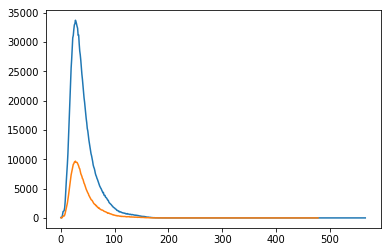

In [20]:
train_data['length_a'] = train_data['question_text'].str.len()
test_data['length_a'] = test_data['question_text'].str.len()

train_data['length_a'].value_counts().sort_index().plot(kind='line')
test_data['length_a'].value_counts().sort_index().plot(kind='line')

print(train_data['length_a'].describe())
print(test_data['length_a'].describe())


count    1.306122e+06
mean     6.885325e+00
std      3.967440e+00
min      0.000000e+00
25%      4.000000e+00
50%      6.000000e+00
75%      8.000000e+00
max      8.100000e+01
Name: word_count, dtype: float64
count    375806.000000
mean          6.891891
std           3.961610
min           0.000000
25%           4.000000
50%           6.000000
75%           8.000000
max          45.000000
Name: word_count, dtype: float64


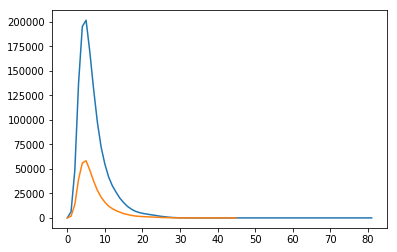

In [21]:
train_data['word_count'] = train_data['question_text'].apply(lambda x: len(str(x).split()) )
test_data['word_count'] = test_data['question_text'].apply(lambda x: len(str(x).split()) )

train_data['word_count'].value_counts().sort_index().plot(kind='line')
test_data['word_count'].value_counts().sort_index().plot(kind='line')
print(train_data['word_count'].describe())
print(test_data['word_count'].describe())

5    201635
4    195215
6    169221
3    137505
7    131416
8     97810
9     72351
2     48361
1      6271
0        70
Name: word_count, dtype: int64
5    58324
4    55921
6    48679
3    39571
7    37673
8    28187
9    21185
2    13591
1     1738
0       27
Name: word_count, dtype: int64


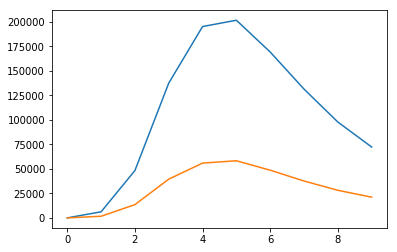

In [22]:
train_data.loc[(train_data.word_count < 10),'word_count'].value_counts().sort_index().plot(kind='line')
test_data.loc[(test_data.word_count < 10),'word_count'].value_counts().sort_index().plot(kind='line')
print(train_data.loc[(train_data.word_count < 10),'word_count'].value_counts())
print(test_data.loc[(test_data.word_count < 10),'word_count'].value_counts())

In [23]:
%%time

from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer

train_text = train_data['question_text']
test_text = test_data['question_text']
train_target = train_data['target']
all_text = train_text.append(test_text)

count_vectorizer = CountVectorizer()
count_vectorizer.fit(all_text)


bag_of_words = count_vectorizer.transform(all_text)
sum_words = bag_of_words.sum(axis=0) 
words_freq = [(word, sum_words[0, idx]) for word, idx in count_vectorizer.vocabulary_.items()]
word_check = pd.DataFrame(words_freq, columns=['word', 'count'])
sorted_word_check= word_check.sort_values('count', ascending=False)
print(sorted_word_check.head(30))
print(sorted_word_check.tail(30))

       word   count
13      whi  210683
11      not  134953
14      doe  120420
70      get   95030
8     would   81851
463    best   80253
10    peopl   73068
351    like   68876
23      use   63854
348      wa   54663
218     ani   51858
110    good   50063
164    make   49004
163     one   46328
345   india   42102
145      ha   41977
118   think   37719
57   differ   37396
297    year   37272
60      thi   36202
73      way   36044
17     time   35492
241    work   35166
127    mani   31475
609    want   30829
112    take   30571
344    much   30208
72       go   29868
143  person   29540
274  someon   29528
                      word  count
122109               ukina      1
122111              motel6      1
122112              icheon      1
122114           burnsitch      1
122115             ashthma      1
122118            novichuk      1
122119              woopra      1
122120               m24a2      1
122121               m24a3      1
122122                hdca      1
122123